# Example: Neural Network for Binary Classification

*An Introduction to Artificial Neural Network, 10 Aug 2024. Kunpeng Yao.*

### The XOR problem
The XOR function, or exclusive OR, is a logical operation that outputs true (or 1) if and only if the inputs differ (i.e., one is true and the other is false). For binary inputs, the XOR function is defined as follows:

#### XOR Truth Table
| Input 1 | Input 2 | XOR Output |
|---------|---------|------------|
|    0    |    0    |      0     |
|    0    |    1    |      1     |
|    1    |    0    |      1     |
|    1    |    1    |      0     |

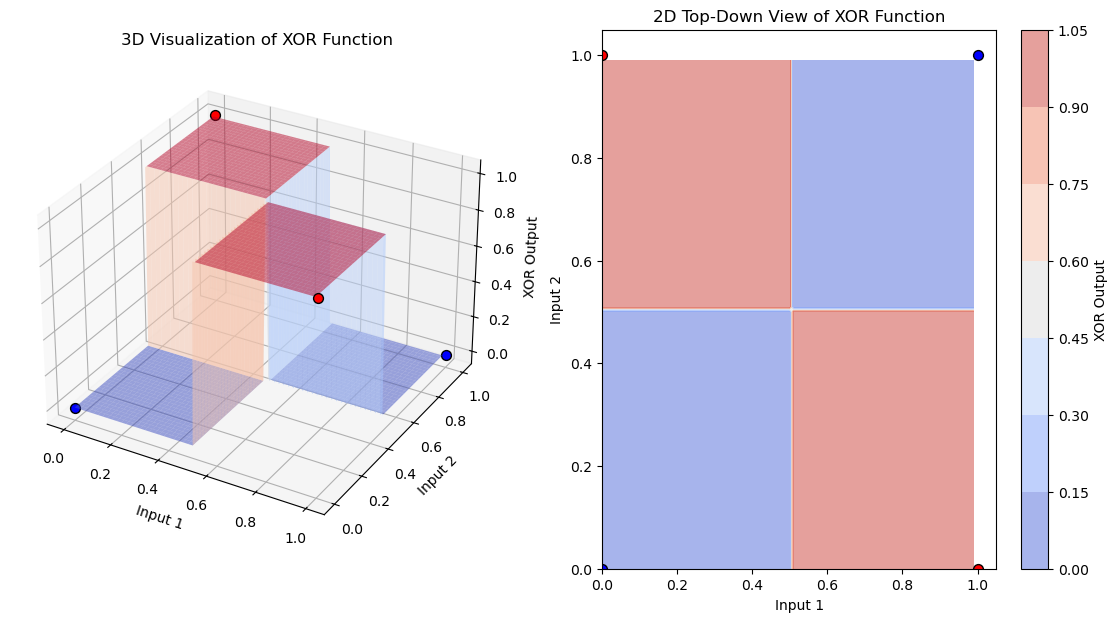

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Import the toolbox
from toolbox import *

# Plot the 3D and 2D visualization of the XOR function
plot_3d_xor()

### Step 1: Implementation of the Neural Network Class

In [2]:
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.1):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes) - 1)]
        self.biases = [np.random.randn(size) for size in layer_sizes[1:]]

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        sigmoid = self._sigmoid(x)
        return sigmoid * (1 - sigmoid)

    def predict(self, input_vector):
        # Forward pass
        activation = input_vector
        for weight, bias in zip(self.weights, self.biases):
            activation = self._sigmoid(np.dot(activation, weight) + bias)
        return activation

    def _compute_gradients(self, input_vector, target):
        # Forward pass
        activations = [input_vector] # this is "a[0]"
        zs = []
        activation = input_vector
        for weight, bias in zip(self.weights, self.biases):
            z = np.dot(activation, weight) + bias
            zs.append(z)
            activation = self._sigmoid(z)
            activations.append(activation)
        
        # Backward pass
        delta = (activations[-1] - target) * self._sigmoid_derivative(zs[-1])
        nabla_b = [delta] # gradients with respect to biases
        nabla_w = [np.outer(activations[-2], delta)] # gradients with respect to weights

        for l in range(2, len(self.layer_sizes)):
            z = zs[-l]
            sp = self._sigmoid_derivative(z)
            delta = np.dot(delta, self.weights[-l + 1].T) * sp
            nabla_b.append(delta)
            nabla_w.append(np.outer(activations[-l - 1], delta))
        
        nabla_b.reverse()
        nabla_w.reverse()
        
        return nabla_b, nabla_w

    def _update_parameters(self, nabla_b, nabla_w):
        # Update weights and biases
        self.biases = [b - self.learning_rate * nb for b, nb in zip(self.biases, nabla_b)]
        self.weights = [w - self.learning_rate * nw for w, nw in zip(self.weights, nabla_w)]

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        
        for iteration in range(iterations):
            # Pick a random data instance
            random_index = np.random.randint(len(input_vectors))
            input_vector = input_vectors[random_index]
            target = targets[random_index]

            # Compute gradients and update parameters
            nabla_b, nabla_w = self._compute_gradients(input_vector, target)
            self._update_parameters(nabla_b, nabla_w)

            # Measure cumulative error every 100 iterations
            if iteration % 100 == 0:
                cumulative_error = 0
                for i in range(len(input_vectors)):
                    prediction = self.predict(input_vectors[i])
                    error = np.square(prediction - targets[i])
                    cumulative_error += error
                cumulative_errors.append(cumulative_error)
        
        return cumulative_errors

### Initializing a Neural Network

In [3]:
# Example usage:
layer_sizes = [2, 5, 5, 5, 1]  # Input layer: 2 neurons, Hidden layers: 5 neurons, Output layer: 1 neuron

# Create the neural network
nn = NeuralNetwork(layer_sizes)

### Visualize the NN Structure

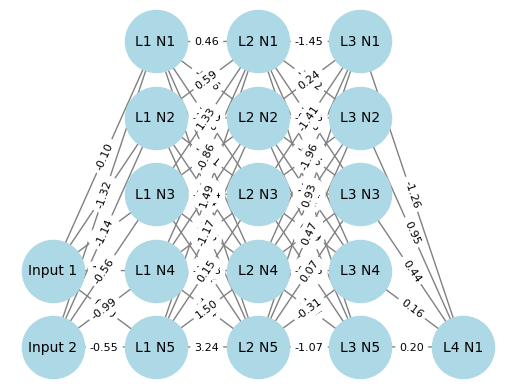

In [4]:
# Visualize the neural network structure
visualize_nn(nn)

### Training the Neural Network

In [5]:
# Training data
input_vectors = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])  # XOR problem

# Train the neural network
iterations = 100000
nn.learning_rate = 0.2
errors = nn.train(input_vectors, targets, iterations)

# Print the final output
for input_vector, target in zip(input_vectors,targets):
    print(f"Input: {input_vector} Output: {nn.predict(input_vector)} Target: {target}")

Input: [0 0] Output: [0.00598597] Target: 0
Input: [0 1] Output: [0.99408686] Target: 1
Input: [1 0] Output: [0.99406361] Target: 1
Input: [1 1] Output: [0.00708287] Target: 0


### Visualize the training error

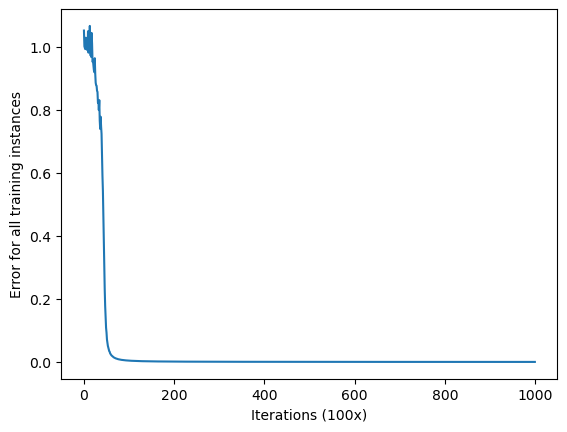

In [6]:
plt.plot(errors)
plt.xlabel("Iterations (100x)")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

# Testing the trained NN

In [7]:
# Testing data (different from training data, but for demonstration we'll use the same XOR inputs)
test_input_vectors = np.array([[0.2, 0.3], [0.1, 0.9], [0.8, 0.1], [0.9, 1.1], [1.1, 0.4]])
test_targets = np.array([0, 1, 1, 0, 1])

# Test the trained neural network
print("Testing the trained neural network:")
for input_vector, target in zip(test_input_vectors, test_targets):
    output = nn.predict(input_vector)
    print(f"Input: {input_vector}, Predicted Output: {output}, Target: {target}")

Testing the trained neural network:
Input: [0.2 0.3], Predicted Output: [0.01092475], Target: 0
Input: [0.1 0.9], Predicted Output: [0.97824097], Target: 1
Input: [0.8 0.1], Predicted Output: [0.93791331], Target: 1
Input: [0.9 1.1], Predicted Output: [0.00829152], Target: 0
Input: [1.1 0.4], Predicted Output: [0.78242532], Target: 1


## A Systematic Evaluation of the NN 

In [11]:
# Evaluate the performance of the trained neural network with N testing samples
N = 1000
evaluate_performance(nn, N)

Success Rate: 79.30%


0.793

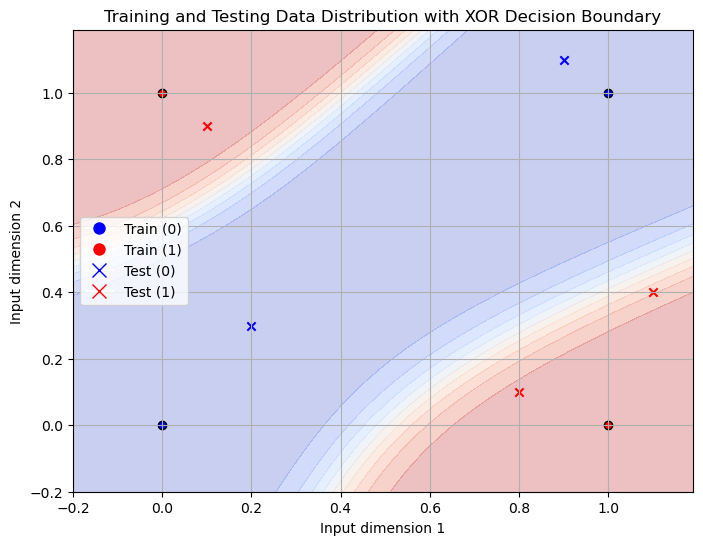

In [12]:
# Visualize the training and testing data
visualize_data(input_vectors, test_input_vectors, targets, test_targets, nn)

### Visualize of the Ideal XOR Plane

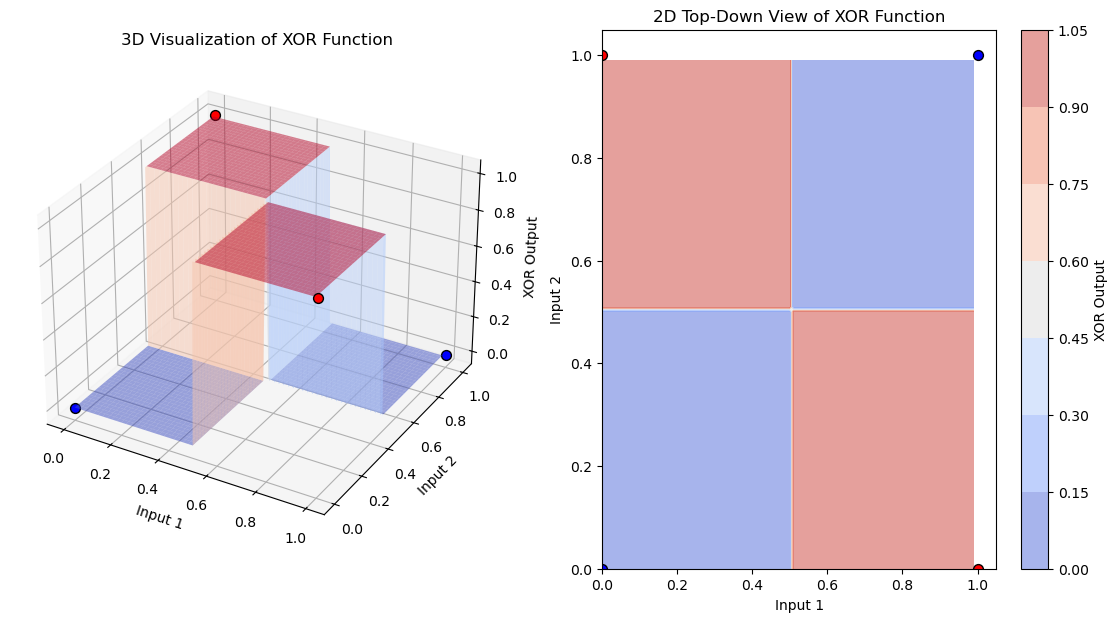

In [13]:
plot_3d_xor()